In [ ]:
from google.colab import drive
import pickle
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


Importing DataFrame from all sessions and combining them together

In [ ]:
file_path = '/content/drive/MyDrive/dataframe_ses1.pickle'

# Open the file in binary read mode
with open(file_path, 'rb') as f:
    # Load the data from the file
    dataframe_ses1 = pickle.load(f)

In [ ]:
file_path = '/content/drive/MyDrive/dataframe_ses2.pickle'

# Open the file in binary read mode
with open(file_path, 'rb') as f:
    # Load the data from the file
    dataframe_ses2 = pickle.load(f)

In [ ]:
file_path = '/content/drive/MyDrive/dataframe_ses3.pickle'

# Open the file in binary read mode
with open(file_path, 'rb') as f:
    # Load the data from the file
    dataframe_ses3 = pickle.load(f)

In [ ]:
file_path = '/content/drive/MyDrive/dataframe_ses4.pickle'

# Open the file in binary read mode
with open(file_path, 'rb') as f:
    # Load the data from the file
    dataframe_ses4 = pickle.load(f)

In [ ]:
file_path = '/content/drive/MyDrive/dataframe_ses5.pickle'

# Open the file in binary read mode
with open(file_path, 'rb') as f:
    # Load the data from the file
    dataframe_ses5 = pickle.load(f)

In [ ]:
dataframe_final = pd.concat([dataframe_ses1,dataframe_ses2,dataframe_ses3,dataframe_ses4,dataframe_ses5],axis = 0 ,ignore_index = True)

Saving final DataFrame

In [ ]:
path = '/content/drive/MyDrive/dataframe_final.pickle'


# Open the file in binary write mode
with open(path, 'wb') as f:
    # Dump the data into the file
    pickle.dump(dataframe_final, f)

In [ ]:
hap_samples = dataframe_final[dataframe_final['emotion'] == 'hap']
print(hap_samples.shape)

(595, 5)


In [ ]:
hap_text = list(hap_samples['text'])

Count Plot of IEMOCAP Dataset

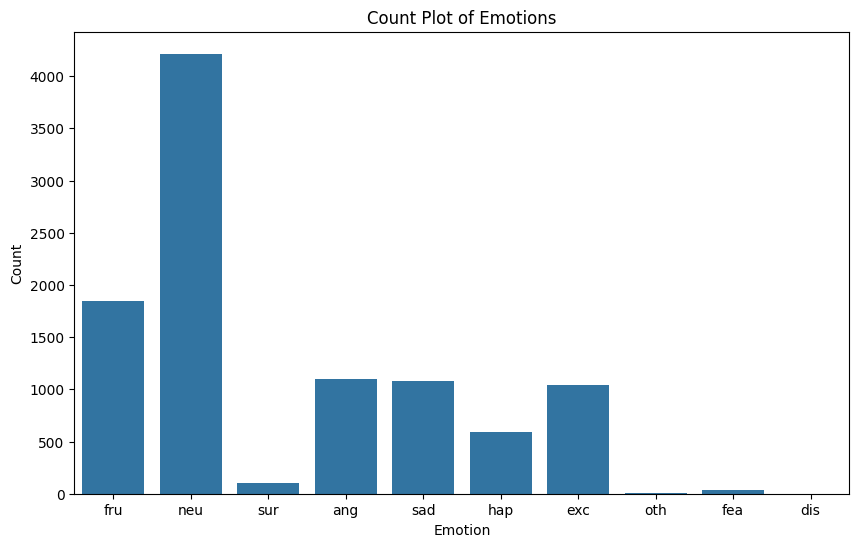

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=dataframe_final, x='emotion')

# Customize the plot (optional)
plt.title('Count Plot of Emotions')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.show()

Downsampling neutral class

In [ ]:
neu_samples = dataframe_final[dataframe_final['emotion'] == 'neu']

# Randomly select 2 samples to remove (in your actual case, use n=2500)
samples_to_remove = neu_samples.sample(n=3100, random_state=42)

# Remove these samples from the DataFrame
df = dataframe_final.drop(samples_to_remove.index)

In [ ]:
indices_to_drop = df[(df['emotion'] == 'fru')|(df['emotion'] == 'sur')|(df['emotion'] == 'oth')|(df['emotion'] == 'fea')|(df['emotion'] == 'dis')].index
df_dropped = df.drop(index=indices_to_drop)

In [ ]:
df_dropped.reset_index(drop=True, inplace=True)

In [ ]:
df_dropped

,time,filename,emotion,scores,text
0,22.3200 - 24.6667,Ses01F_script01_1_F003,neu,"3.0000, 3.0000, 2.6667",When?
1,40.0200 - 44.9688,Ses01F_script01_1_F005,neu,"2.0000, 1.6667, 2.0000","He's dreaming of him again, walking around."
2,46.9500 - 52.3200,Ses01F_script01_1_F006,neu,"1.6667, 2.3333, 3.3333",It's getting to be just like after he died. W...
3,58.9500 - 60.8800,Ses01F_script01_1_F007,neu,"2.6667, 3.6667, 3.6667",What?
4,165.6573 - 169.5590,Ses01F_script01_1_F016,neu,"2.6667, 2.6667, 3.0000","Well that's only your business, Chris."
...,...,...,...,...,...
4933,236.5700 - 244.8300,Ses05M_script03_2_M041,ang,"1.0000, 4.5000, 5.0000","You are a vile tempered, wicked living, evil l..."
4934,244.8400 - 246.5800,Ses05M_script03_2_M042,ang,"1.0000, 4.5000, 4.5000","Oh, you're not going like this."
4935,246.5900 - 248.8300,Ses05M_script03_2_M043,ang,"1.5000, 4.0000, 4.5000","[GARBAGE] No, you're not."
4936,255.8600 - 260.3300,Ses05M_script03_2_M044,ang,"1.0000, 5.0000, 5.0000",oh! Marry you again? I wouldn't marry you agai...


In [ ]:
count_dict = df_dropped.copy()
count_dict = count_dict.drop(columns=['time', 'filename','scores','text'])

In [ ]:
temp = count_dict.copy()

In [ ]:
neu_samples = temp[temp['emotion'] == 'hap']

# Randomly select 2 samples to remove (in your actual case, use n=2500)
samples_to_remove = neu_samples.sample(n=90, random_state=42)

# Remove these samples from the DataFrame
df =temp.drop(samples_to_remove.index)

In [ ]:
len(count_dict[count_dict['emotion']=='hap'])

1100

Final Count plot of the Dataset

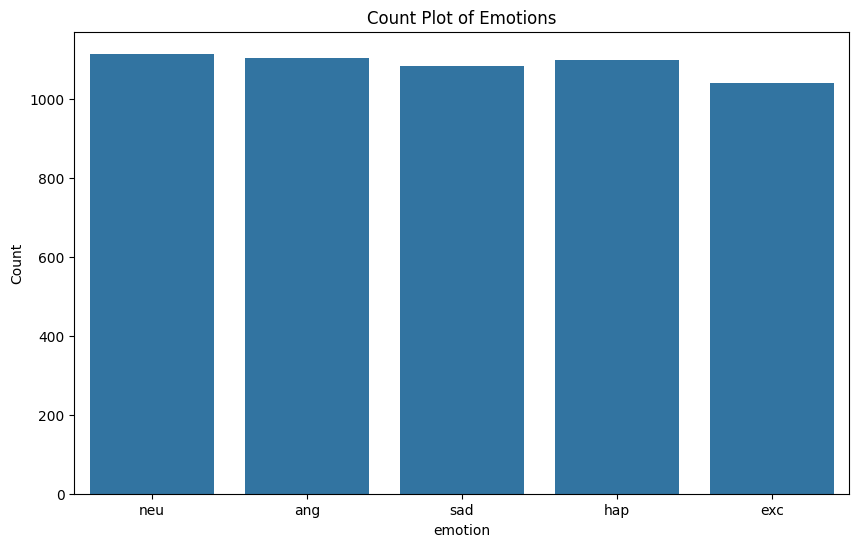

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='emotion')

# Customize the plot (optional)
plt.title('Count Plot of Emotions')
plt.xlabel('emotion')
plt.ylabel('Count')
plt.show()


In [ ]:
path = '/content/drive/MyDrive/df_dropped_augment.pickle'


# Open the file in binary write mode
with open(path, 'wb') as f:
    # Dump the data into the file
    pickle.dump(df_dropped, f)

In [ ]:
!pip install nlpaug



In [ ]:
!pip install googletrans==3.1.0a0

In [ ]:
import random
import nltk
from nltk.corpus import wordnet
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

Text Augmentation

In [ ]:
#Text Augmentation
def get_synonyms(word):
    synonyms = set()
    for syn in wordnet.synsets(word):
        for lemma in syn.lemmas():
            synonyms.add(lemma.name())
    return list(synonyms)

def synonym_replacement(text, n):
    words = text.split()
    new_words = words.copy()
    random_word_list = list(set([word for word in words if wordnet.synsets(word)]))
    random.shuffle(random_word_list)
    num_replaced = 0
    for random_word in random_word_list:
        synonyms = get_synonyms(random_word)
        if len(synonyms) >= 1:
            synonym = random.choice(synonyms)
            new_words = [synonym if word == random_word else word for word in new_words]
            num_replaced += 1
        if num_replaced >= n:
            break
    return ' '.join(new_words)

def random_insertion(text, n):
    words = text.split()
    for _ in range(n):
        new_word = random.choice(words)
        synonyms = get_synonyms(new_word)
        # Check if synonyms exist before trying to choose from them
        if synonyms:
            synonym = random.choice(synonyms)
            random_idx = random.randint(0, len(words)-1)
            words.insert(random_idx, synonym)
    return ' '.join(words)

def random_deletion(text, p):
    words = text.split()
    if len(words) == 1:
        return text
    new_words = []
    for word in words:
        r = random.uniform(0, 1)
        if r > p:
            new_words.append(word)
    if len(new_words) == 0:
        return random.choice(words)
    else:
        return ' '.join(new_words)

def random_swap(text, n):
    words = text.split()
    if len(words) >= 2:
      for _ in range(n):
        idx1, idx2 = random.sample(range(len(words)), 2)
        words[idx1], words[idx2] = words[idx2], words[idx1]
    return ' '.join(words)



def random_augmentation(text):
    augmentation_functions = [
        lambda x: synonym_replacement(x, 2),
        lambda x: random_insertion(x, 2),
        lambda x: random_deletion(x, 0.3),
        lambda x: random_swap(x, 2),

    ]
    aug_func = random.choice(augmentation_functions)
    return aug_func(text)

text =df_dropped['text'][99]
print(text)
augmented_text = random_augmentation(text)
print(augmented_text)



A rapper party ho. Yeah. Okay.
rapper party Yeah.


Audio Augmentation

In [ ]:
import random

def apply_random_augmentation(y,sr):


    augmentations = [
        time_stretch,
        pitch_shift,
        add_noise,
        time_shift,
        volume_adjust,
    ]

    augmentation = random.choice(augmentations)
    y_aug = augmentation(y, sr)

    return y_aug

def time_stretch(y, sr, rate=None):
    if rate is None:
        rate = np.random.uniform(0.8, 1.2)
    return librosa.effects.time_stretch(y, rate=rate)

def pitch_shift(y, sr, n_steps=None):
    if n_steps is None:
        n_steps = np.random.randint(-5, 5)
    return librosa.effects.pitch_shift(y, sr=sr, n_steps=n_steps)

def add_noise(y, sr, noise_level=None):
    if noise_level is None:
        noise_level = np.random.uniform(0.001, 0.005)
    noise = np.random.randn(len(y))
    return y + noise_level * noise

def time_shift(y, sr, shift_max=None):
    if shift_max is None:
        shift_max = sr // 2  # Max shift by 0.5 seconds
    shift = np.random.randint(-shift_max, shift_max)
    return np.roll(y, shift)

def volume_adjust(y, sr, gain=None):
    if gain is None:
        gain = np.random.uniform(0.5, 1.5)
    return y * gain





**Extracting MFCCS,Transcriptions and labels for each session**


In [ ]:
def extract_mfccs_text_emotion(path):
  file_name = path.split('/')[-1]
  file_name= file_name.split('.')[0]
  target_sr = 16000
  top_db=20
  n_mfcc=13
  n_fft=2048
  hop_length=512
  #emo = ['neu','hap','sad','ang','exc']
  emo = df_dropped[df_dropped['filename'] == file_name].emotion
  #emo = emo.iloc[0]
  if(len(emo)>0):
    #loading audio
    audio , sr = librosa.load(path, sr = None)

    #resampling audio
    resampled_audio = librosa.resample(audio,orig_sr = sr,target_sr = target_sr)

    #extracting non silent parts
    non_silent_intervals = librosa.effects.split(resampled_audio, top_db=top_db)

    # Concatenate non-silent parts
    y_non_silent = np.concatenate([resampled_audio[start:end] for start, end in non_silent_intervals])

    # Extract MFCC features
    mfccs = librosa.feature.mfcc(y=y_non_silent, sr=target_sr, n_mfcc=n_mfcc, n_fft=n_fft, hop_length=hop_length)
    print('mfccs')
    mfccs_ses1.append(mfccs)

    x = df_dropped[df_dropped['filename'] == file_name].emotion
    y = df_dropped[df_dropped['filename'] == file_name].text


    txt = y.iloc[0]


    e = x.iloc[0]

    print(e)
    emotion_ses1.append(e)
    print(txt)
    text_ses1.append(txt)
    print("Complete : ",file_name)





Data augmentation for 'hap' class . This function is commented out,we will use at the time augmentation.

In [ ]:
# def extract_mfccs_text_emotion(path):
#   file_name = path.split('/')[-1]
#   file_name= file_name.split('.')[0]
#   target_sr = 16000
#   top_db=20
#   n_mfcc=13
#   n_fft=2048
#   hop_length=512
#   #emo = ['neu','hap','sad','ang','exc']
#   emo = hap_samples[hap_samples['filename'] == file_name].emotion
#   #emo = emo.iloc[0]
#   if(len(emo)>0):
#     audio , sr = librosa.load(path, sr = None)
#     resampled_audio = librosa.resample(audio,orig_sr = sr,target_sr = target_sr)

#     non_silent_intervals = librosa.effects.split(resampled_audio, top_db=top_db)

#     # Concatenate non-silent parts
#     y_non_silent = np.concatenate([resampled_audio[start:end] for start, end in non_silent_intervals])

#     y_aug = apply_random_augmentation(y_non_silent,target_sr)
#     # Extract MFCC features
#     mfccs = librosa.feature.mfcc(y=y_aug, sr=target_sr, n_mfcc=n_mfcc, n_fft=n_fft, hop_length=hop_length)
#     print('mfccs')
#     mfccs_ses1.append(mfccs)#CHANGE HERE

#     x = hap_samples[hap_samples['filename'] == file_name].emotion
#     y = hap_samples[hap_samples['filename'] == file_name].text


#     txt = y.iloc[0]
#     augmented_text = random_augmentation(txt)

#     e = x.iloc[0]
#     new_emo = {'emotion': e}

#    # Add new row using loc
#     count_dict.loc[len(count_dict)] = new_emo

#     print(e)
#     emotion_ses1.append(e)#CHANGE HERE
#     print(txt)
#     text_ses1.append(augmented_text)#CHANGE HERE
#     print("Complete : ",file_name)





In [ ]:
mfccs_ses1=[]#CHANGE HERE
emotion_ses1=[]#CHANGE HERE
text_ses1 = []#CHANGE HERE

In [ ]:
path = '/content/drive/MyDrive/IEMOCAP_full_release/Session5/sentences/wav'


File Crawler

In [ ]:
import os
audio_paths = []
for root , dirs ,  files in os.walk(path):

  for filename in files:

    file_path = os.path.join(root,filename)

    audio_paths.append(file_path)

print(len(audio_paths))

2172


In [ ]:
for path in audio_paths :
  extract_mfccs_text_emotion(path)

mfccs
hap
Yes, I did notice that.  It does look really beautiful over the water.  Big old white moon.
Complete :  Ses05M_script02_2_F034
mfccs
hap
Or not.
Complete :  Ses05M_script02_2_F038
mfccs
hap
No.  I'm beginning to think you might be right. I think  this might be the spot after all.  Augie, I'm sorry.
Complete :  Ses05M_script02_2_F037
mfccs
hap
Actually, now that you mention it, no.  I don't.
Complete :  Ses05M_script02_2_M034
mfccs
hap
I don't know.  I think this is a pretty good spot.  I mean, look at the view of the moon from here.
Complete :  Ses05M_script02_2_M035
mfccs
hap
Oh, well look what we've got here.
Complete :  Ses05M_script02_2_M036
mfccs
hap
Well, it isn't champagne.
Complete :  Ses05M_script02_2_M037
mfccs
hap
Or not.
Complete :  Ses05M_script02_2_M040
mfccs
hap
It's all right.  It's a good thing.  It's lovely here.  The air is sweet.
Complete :  Ses05M_script01_3_F001
mfccs
hap
Oh, Chris I've been ready for a long time.
Complete :  Ses05M_script01_3_F009
mfccs

In [ ]:
text_ses1

In [ ]:
path = '/content/drive/MyDrive/mfccs_ses5_hap.pickle'


# Open the file in binary write mode
with open(path, 'wb') as f:
    # Dump the data into the file
    pickle.dump(mfccs_ses1, f)
path = '/content/drive/MyDrive/text_ses5_hap.pickle'


# Open the file in binary write mode
with open(path, 'wb') as f:
    # Dump the data into the file
    pickle.dump(text_ses1, f)

path = '/content/drive/MyDrive/emotion_ses5_hap.pickle'


# Open the file in binary write mode
with open(path, 'wb') as f:
    # Dump the data into the file
    pickle.dump(emotion_ses1, f)

In [ ]:
max_length =max([len(sentence) for sentence in tokenized_sentences])
vocab_size = len(tokenizer.word_index) +1

In [ ]:

tokenized_text_ses1 = tokenizer.texts_to_sequences(text_ses1)
padded_text_ses1 = pad_sequences(tokenized_text_ses1,maxlen = max_length,padding = 'post')

In [ ]:
#save padded_text_ses1

In [ ]:
# max_padding = max([item.shape[1] for item in mfccs_ses1])
# print(max_padding)

In [ ]:
# padded_mfccs_ses1 = []
# for mfccs in mfccs_ses1:
#   pad_width = max_padding - mfccs.shape[1]


#   if pad_width > 0:
#     mfccs = np.pad(mfccs, pad_width=((0, 0), (0, pad_width)), mode='constant')
#     padded_mfccs_ses1.append(mfccs)
#   else:
#     mfccs = mfccs[:, :max_padding]
#     padded_mfccs_ses1.append(mfccs)

In [ ]:
le = LabelEncoder()
y_encoded =to_categorical(le.fit_transform(emotion_ses1))#CHANGE HERE

In [ ]:
#save y_encoded
#save mfccs_ses1

In [ ]:
# padded_mfccs_ses1_transposed = [np.transpose(m) for m in padded_mfccs_ses1 ]

In [ ]:
target_sr = 16000
top_db=20
audio , sr = librosa.load('/content/drive/MyDrive/IEMOCAP_full_release/Session1/sentences/wav/Ses01F_impro01/Ses01F_impro01_F000.wav', sr = None)
resampled_audio = librosa.resample(audio,orig_sr = sr,target_sr = target_sr)

n_mfcc=13
n_fft=2048
hop_length=512
mfccs1 = librosa.feature.mfcc(y=resampled_audio, sr=target_sr, n_mfcc=n_mfcc, n_fft=n_fft, hop_length=hop_length)
non_silent_intervals = librosa.effects.split(resampled_audio, top_db=top_db)

    # Concatenate non-silent parts
y_non_silent = np.concatenate([resampled_audio[start:end] for start, end in non_silent_intervals])


    # Extract MFCC features
mfccs2 = librosa.feature.mfcc(y=y_non_silent, sr=target_sr, n_mfcc=n_mfcc, n_fft=n_fft, hop_length=hop_length)

[[1], [2], [3], 4, 5, 6]


In [ ]:
mfccs1.shape

(13, 61)